In [1]:
#install libraries and packages to use with environment for analysis
import matplotlib.pyplot as plt #use for visualizations
import numpy as np #work with arrays for computations
import pandas as pd #data manipulation and cleaning, creation of dataframes
import seaborn as sns #visualizations
from sklearn.feature_selection import SelectKBest, f_regression #features selections
from sklearn.metrics import mean_squared_error as MSE #metric for mean squared error
from sklearn.model_selection import train_test_split #splitting data
from sklearn.tree import DecisionTreeRegressor #analysis method, regression tree
from sklearn.tree import plot_tree #plotting decision tree

In [2]:
#import the telecommunications churn dataset csv file to be used. 
#view dataset to ensure proper loading.

df = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.shape

(10000, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
#renaming unclear variables.
df = df.rename(columns = { "Item1": "Timely_Respd", "Item2": "Timely_Fixes",
                                "Item3": "Timely_Replc", "Item4": "Reliability", "Item5": "Options",
                                "Item6": "Respect_Resp", "Item7": "Courteous_Exch", 
                                "Item8": "Evidence_ActListen"})

In [6]:
#summary statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
#finding duplicates
df.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
#finding nulls
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [9]:
#finding outliers
def find_outliers(df, var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1-(1.5*IQR)
    upperbound = q3+(1.5*IQR)
    outliers = df[var][((df[var] < (lowerbound)) | (df[var] > (upperbound)))]
    return outliers

#running created function on quantitative variables

outliers = find_outliers(df, 'Population')
print("number of outliers in Population: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'MonthlyCharge')
print("number of outliers in MonthlyCharge: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Children')
print("number of outliers in Children: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Age')
print("number of outliers in Age: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Income')
print("number of outliers in Income: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Yearly_equip_failure')
print("number of outliers in Yearly_equip_failure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Outage_sec_perweek')
print("number of outliers in Outage_sec_perweek: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Email')
print("number of outliers in Email: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Contacts')
print("number of outliers in Contacts: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(df, 'Bandwidth_GB_Year')
print("number of outliers in Bandwidth_GB_Year: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers in Population: 937
max outlier value: 111850
min outlier value: 31816
number of outliers in MonthlyCharge: 0
max outlier value: nan
min outlier value: nan
number of outliers in Children: 401
max outlier value: 10
min outlier value: 8
number of outliers in Age: 0
max outlier value: nan
min outlier value: nan
number of outliers in Income: 336
max outlier value: 258900.7
min outlier value: 104362.5
number of outliers in Yearly_equip_failure: 94
max outlier value: 6
min outlier value: 3
number of outliers in Outage_sec_perweek: 76
max outlier value: 21.20723
min outlier value: 0.09974694
number of outliers in Email: 38
max outlier value: 23
min outlier value: 1
number of outliers in Contacts: 8
max outlier value: 7
min outlier value: 6
number of outliers in Bandwidth_GB_Year: 0
max outlier value: nan
min outlier value: nan


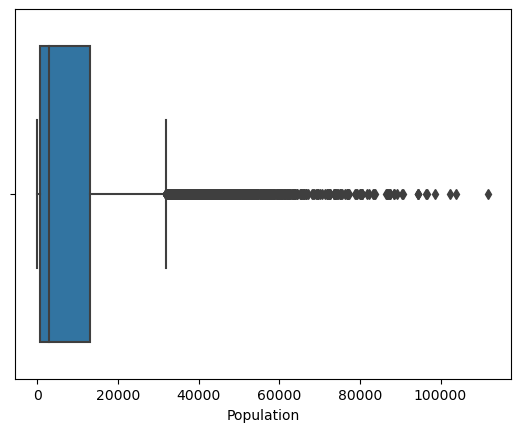

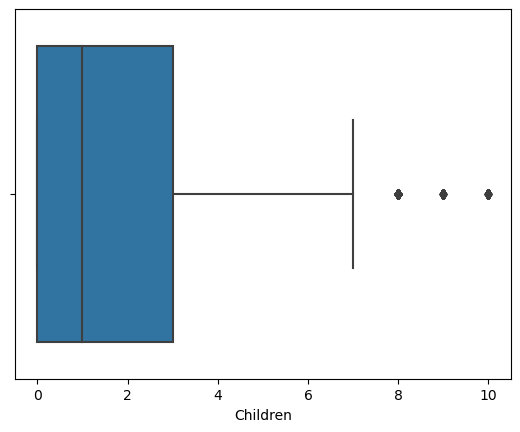

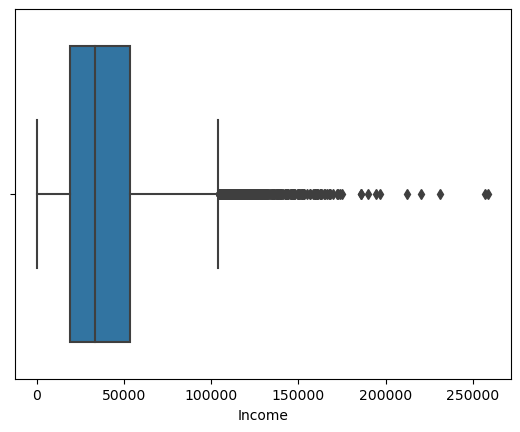

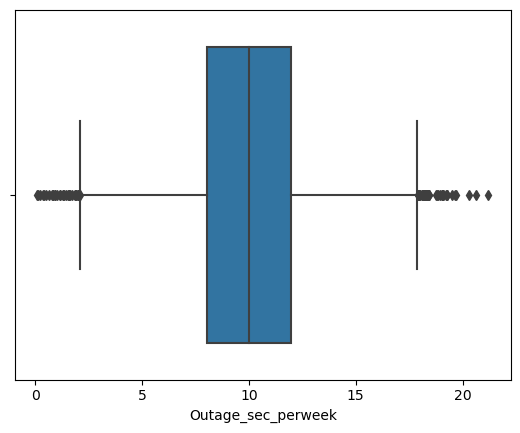

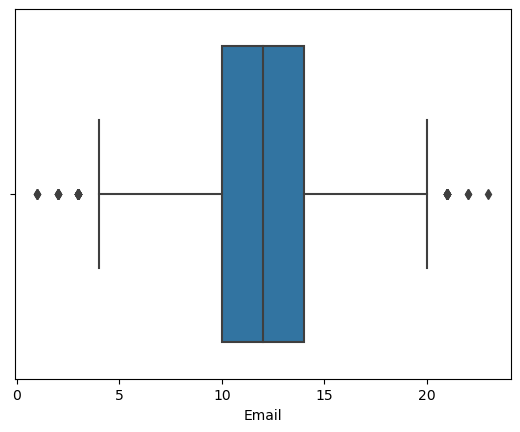

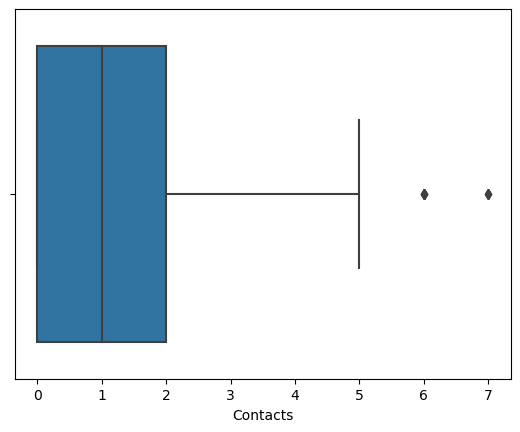

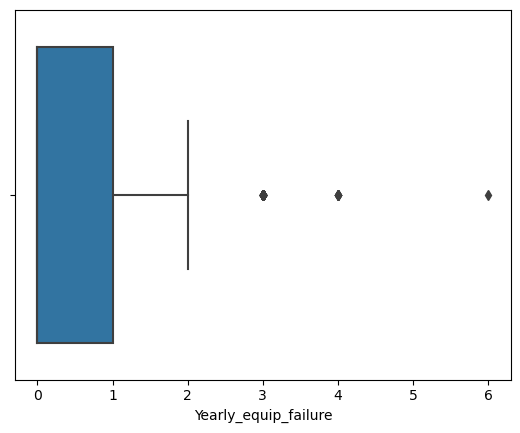

In [10]:
#boxplotting all variables showing outliers

boxplot=sns.boxplot(x='Population',data=df)
plt.show()
boxplot=sns.boxplot(x='Children',data=df)
plt.show()
boxplot=sns.boxplot(x='Income',data=df)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)
plt.show()
boxplot=sns.boxplot(x='Email',data=df)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=df)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=df)
plt.show()

In [11]:
#treating outliers found.

def find_boundary(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    return lower , upper


lower_pop, upper_pop = find_boundary(df, 'Population' )
print("Upper limit for population is" , upper_pop)
print("Lower limit for population is" , lower_pop)
df.Population = np.where(df.Population > upper_pop, upper_pop,
                               np.where(df.Population < lower_pop, lower_pop, df.Population))

lower_kid, upper_kid = find_boundary(df, 'Children')
print("Upper limit for children is" , upper_kid)
print("Lower limit for children is" , lower_kid)
df.Children = np.where(df.Children > upper_kid, upper_kid,
                               np.where(df.Children < lower_kid, lower_kid, df.Children))

lower_inc, upper_inc = find_boundary(df, 'Income')
print("Upper limit for Income is" , upper_inc)
print("Lower limit for Income is" , lower_inc)
df.Income = np.where(df.Income > upper_inc, upper_inc,
                               np.where(df.Income < lower_inc, lower_inc, df.Income))

lower_osp, upper_osp = find_boundary(df, 'Outage_sec_perweek')
print("Upper limit for Outage_sec_perweek is" , upper_osp)
print("Lower limit for Outage_sec_perweek is" , lower_osp)
df.Outage_sec_perweek = np.where(df.Outage_sec_perweek > upper_osp, upper_osp,
                               np.where(df.Outage_sec_perweek < lower_osp, lower_osp, df.Outage_sec_perweek))

lower_eml, upper_eml = find_boundary(df, 'Email')
print("Upper limit for email is" , upper_eml)
print("Lower limit for email is" , lower_eml)
df.Email = np.where(df.Email > upper_eml, upper_eml,
                               np.where(df.Email < lower_eml, lower_eml, df.Email))

lower_contct, upper_contct = find_boundary(df, 'Contacts')
print("Upper limit for contacts is" , upper_contct)
print("Lower limit for contacts is" , lower_contct)
df.Contacts = np.where(df.Contacts > upper_contct, upper_contct,
                               np.where(df.Contacts < lower_contct, lower_contct, df.Contacts))

lower_yef, upper_yef = find_boundary(df, 'Yearly_equip_failure')
print("Upper limit for contacts is" , upper_yef)
print("Lower limit for contacts is" , lower_yef)
df.Yearly_equip_failure = np.where(df.Yearly_equip_failure > upper_yef, upper_yef,
                               np.where(df.Yearly_equip_failure < lower_yef, lower_yef, df.Yearly_equip_failure))


Upper limit for population is 31813.0
Lower limit for population is -17907.0
Upper limit for children is 7.5
Lower limit for children is -4.5
Upper limit for Income is 104278.34875
Lower limit for Income is -31807.46125
Upper limit for Outage_sec_perweek is 17.8963915
Lower limit for Outage_sec_perweek is 2.0913075
Upper limit for email is 20.0
Lower limit for email is 4.0
Upper limit for contacts is 5.0
Lower limit for contacts is -3.0
Upper limit for contacts is 2.5
Lower limit for contacts is -1.5


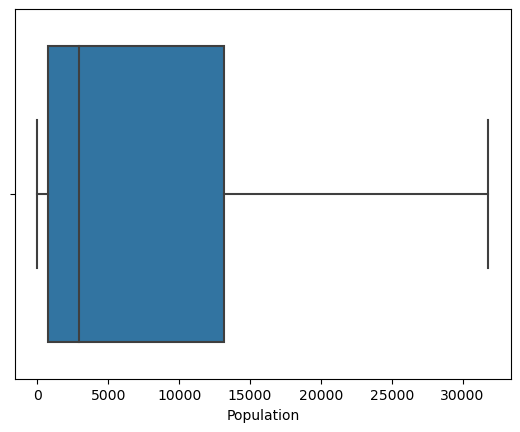

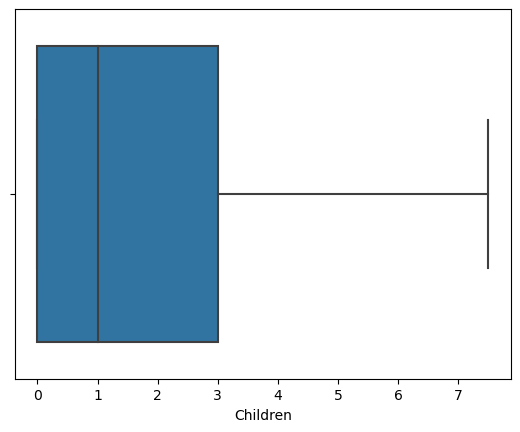

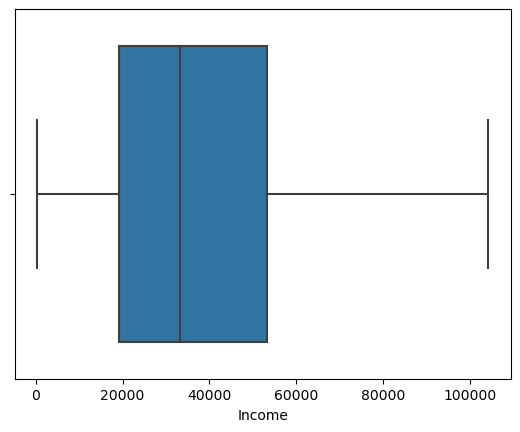

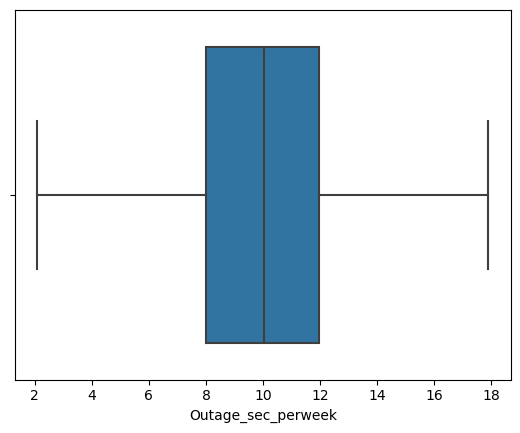

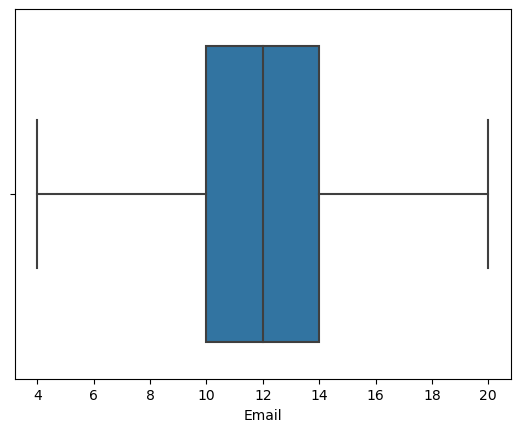

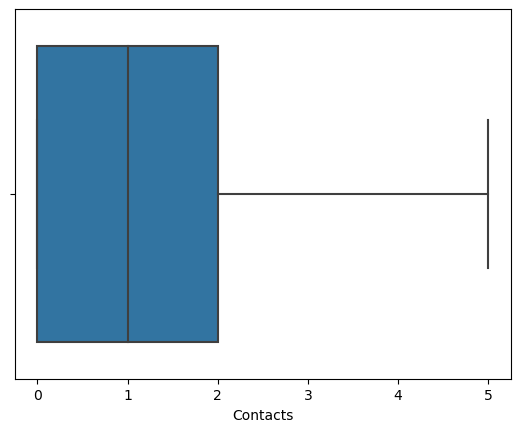

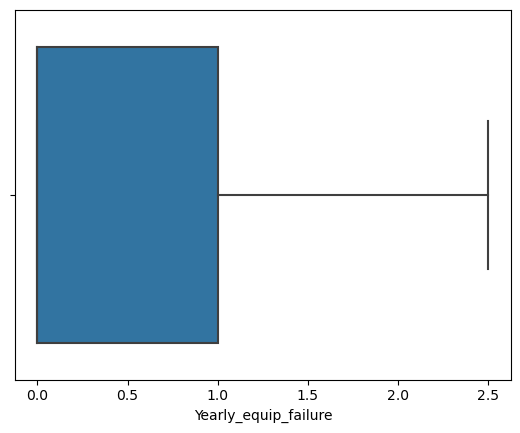

In [12]:
#re-boxplotting all variables showing outliers

boxplot=sns.boxplot(x='Population',data=df)
plt.show()
boxplot=sns.boxplot(x='Children',data=df)
plt.show()
boxplot=sns.boxplot(x='Income',data=df)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)
plt.show()
boxplot=sns.boxplot(x='Email',data=df)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=df)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=df)
plt.show()

In [13]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'],
      dtype='object')

In [14]:
print(f'CaseOrder: {df.CaseOrder.nunique()}')
print(f'Customer_id: {df.Customer_id.nunique()}')
print(f'Interaction: {df.Interaction.nunique()}')
print(f'UID: {df.UID.nunique()}')
print(f'City: {df.City.nunique()}')
print(f'State: {df.State.nunique()}')
print(f'County: {df.County.nunique()}')
print(f'Zip: {df.Zip.nunique()}')
print(f'Lat: {df.Lat.nunique()}')
print(f'Lng: {df.Lng.nunique()}')
print(f'Population: {df.Population.nunique()}')
print(f'Area: {df.Area.nunique()}')
print(f'TimeZone: {df.TimeZone.nunique()}')
print(f'Job: {df.Job.nunique()}')
print(f'Children: {df.Children.nunique()}')
print(f'Age: {df.Age.nunique()}')
print(f'Income: {df.Income.nunique()}')
print(f'Marital: {df.Marital.nunique()}')
print(f'Gender: {df.Gender.nunique()}')
print(f'Churn: {df.Churn.nunique()}')
print(f'Outage_sec_perweek: {df.Outage_sec_perweek.nunique()}')
print(f'Email: {df.Email.nunique()}')
print(f'Contacts: {df.Contacts.nunique()}')
print(f'Yearly_equip_failure: {df.Yearly_equip_failure.nunique()}')
print(f'Techie: {df.Techie.nunique()}')
print(f'Contract: {df.Contract.nunique()}')
print(f'Port_modem: {df.Port_modem.nunique()}')
print(f'Tablet: {df.Tablet.nunique()}')
print(f'InternetService: {df.InternetService.nunique()}')
print(f'Phone: {df.Phone.nunique()}')
print(f'Multiple: {df.Multiple.nunique()}')
print(f'OnlineSecurity: {df.OnlineSecurity.nunique()}')
print(f'OnlineBackup: {df.OnlineBackup.nunique()}')
print(f'DeviceProtection: {df.DeviceProtection.nunique()}')
print(f'TechSupport: {df.TechSupport.nunique()}')
print(f'StreamingTV: {df.StreamingTV.nunique()}')
print(f'StreamingMovies: {df.StreamingMovies.nunique()}')
print(f'PaperlessBilling: {df.PaperlessBilling.nunique()}')
print(f'PaymentMethod: {df.PaymentMethod.nunique()}')
print(f'Tenure: {df.Tenure.nunique()}')
print(f'MonthlyCharge: {df.MonthlyCharge.nunique()}')
print(f'Bandwidth_GB_Year: {df.Bandwidth_GB_Year.nunique()}')
print(f'Timely_Respd: {df.Timely_Respd.nunique()}')
print(f'Timely_Fixes: {df.Timely_Fixes.nunique()}')
print(f'Timely_Replc: {df.Timely_Replc.nunique()}')
print(f'Reliability: {df.Reliability.nunique()}')
print(f'Options: {df.Options.nunique()}')
print(f'Respect_Resp: {df.Respect_Resp.nunique()}')
print(f'Courteous_Exch: {df.Courteous_Exch.nunique()}')
print(f'Evidence_ActListen: {df.Evidence_ActListen.nunique()}')

CaseOrder: 10000
Customer_id: 10000
Interaction: 10000
UID: 10000
City: 6058
State: 52
County: 1620
Zip: 8583
Lat: 8563
Lng: 8630
Population: 5152
Area: 3
TimeZone: 25
Job: 639
Children: 9
Age: 72
Income: 9658
Marital: 5
Gender: 3
Churn: 2
Outage_sec_perweek: 9912
Email: 17
Contacts: 6
Yearly_equip_failure: 4
Techie: 2
Contract: 3
Port_modem: 2
Tablet: 2
InternetService: 3
Phone: 2
Multiple: 2
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtection: 2
TechSupport: 2
StreamingTV: 2
StreamingMovies: 2
PaperlessBilling: 2
PaymentMethod: 4
Tenure: 9996
MonthlyCharge: 750
Bandwidth_GB_Year: 10000
Timely_Respd: 7
Timely_Fixes: 7
Timely_Replc: 8
Reliability: 7
Options: 7
Respect_Resp: 8
Courteous_Exch: 7
Evidence_ActListen: 8


In [15]:
#dropping categorical variables with high cardinality and unneeded variables
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
       'Email', 'Contacts', 'Yearly_equip_failure',
       'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 
       'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Children            10000 non-null  float64
 2   Age                 10000 non-null  int64  
 3   Income              10000 non-null  float64
 4   Marital             10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Churn               10000 non-null  object 
 7   Outage_sec_perweek  10000 non-null  float64
 8   Techie              10000 non-null  object 
 9   Contract            10000 non-null  object 
 10  InternetService     10000 non-null  object 
 11  DeviceProtection    10000 non-null  object 
 12  TechSupport         10000 non-null  object 
 13  Tenure              10000 non-null  float64
 14  MonthlyCharge       10000 non-null  float64
 15  Bandwidth_GB_Year   10000 non-null  float64
dtypes: fl

In [17]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.038650,53.078400,39005.334061,10.001181,34.526188,172.624816,3392.341550
std,1.997306,20.698882,25578.172567,2.957834,26.443063,42.943094,2185.294852
min,0.000000,18.000000,348.670000,2.091308,1.000259,79.978860,155.506715
25%,0.000000,35.000000,19224.717500,8.018214,7.917694,139.979239,1236.470827
50%,1.000000,53.000000,33170.605000,10.018560,35.430507,167.484700,3279.536903
75%,3.000000,71.000000,53246.170000,11.969485,61.479795,200.734725,5586.141370
max,7.500000,89.000000,104278.348750,17.896392,71.999280,290.160419,7158.981530


In [18]:
#re-expression of independent variables
#get dummies to complete one hot encoding on nominal categorical variables
df= pd.get_dummies(df, columns=['Area', 'Marital', 'Gender', 'Contract', 'InternetService'], prefix_sep=" " , drop_first=True)

In [19]:
#convert ordinal categorical to numerical
df['Techie']=df['Techie'].astype('category')
df['Techie']=df['Techie'].cat.codes
df['DeviceProtection']=df['DeviceProtection'].astype('category')
df['DeviceProtection']=df['DeviceProtection'].cat.codes
df['TechSupport']=df['TechSupport'].astype('category')
df['TechSupport']=df['TechSupport'].cat.codes
df['Churn']=df['Churn'].astype('category')
df['Churn']=df['Churn'].cat.codes

In [20]:
df.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Techie,DeviceProtection,TechSupport,Tenure,MonthlyCharge,Bandwidth_GB_Year,Area Suburban,Area Urban,Marital Married,Marital Never Married,Marital Separated,Marital Widowed,Gender Male,Gender Nonbinary,Contract One year,Contract Two Year,InternetService Fiber Optic,InternetService None
0,0.0,68,28561.99,0,7.978323,0,0,0,6.795513,172.455519,904.536110,0,1,0,0,0,1,1,0,1,0,1,0
1,1.0,27,21704.77,1,11.699080,1,0,0,1.156681,242.632554,800.982766,0,1,1,0,0,0,0,0,0,0,1,0
2,4.0,50,9609.57,0,10.752800,1,0,0,15.754144,159.947583,2054.706961,0,1,0,0,0,1,0,0,0,1,0,0
3,1.0,48,18925.23,0,14.913540,1,0,0,17.087227,119.956840,2164.579412,1,0,1,0,0,0,1,0,0,1,0,0
4,0.0,83,40074.19,1,8.147417,0,0,1,1.670972,149.948316,271.493436,1,0,0,0,1,0,1,0,0,0,1,0


In [21]:
#feature selection method SelectKBest
X= df.drop(['Tenure'], axis=1)
y=df['Tenure']

In [22]:
names_features= X.columns
skb = SelectKBest(score_func = f_regression, k='all')
X_skb = skb.fit_transform(X, y)

In [23]:
#p-values of statistically significant features
p_values = pd.DataFrame({'Feature': names_features, 'p_value':skb.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < 0.05]
features = p_values['Feature'][p_values['p_value'] < 0.05]
features

3                Churn
9    Bandwidth_GB_Year
6     DeviceProtection
Name: Feature, dtype: object

In [24]:
df.columns

Index(['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Techie',
       'DeviceProtection', 'TechSupport', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area Suburban', 'Area Urban', 'Marital Married',
       'Marital Never Married', 'Marital Separated', 'Marital Widowed',
       'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None'],
      dtype='object')

In [25]:
#dropping unneeded variables
df.drop(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Techie',
       'TechSupport', 'MonthlyCharge', 'Area Suburban', 'Area Urban', 'Marital Married',
       'Marital Never Married', 'Marital Separated', 'Marital Widowed',
       'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None'], axis=1, inplace=True)

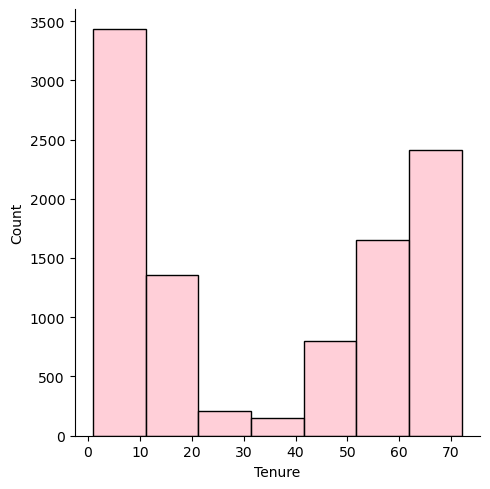

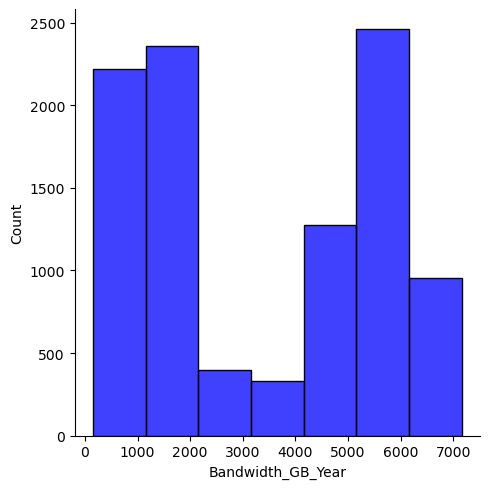

In [26]:
#data exploration to show distribution of variables.
sns.displot(df['Tenure'], kde=False, color='pink', bins=7)
sns.displot(df['Bandwidth_GB_Year'], kde=False, color='blue', bins=7)

<AxesSubplot: xlabel='DeviceProtection'>

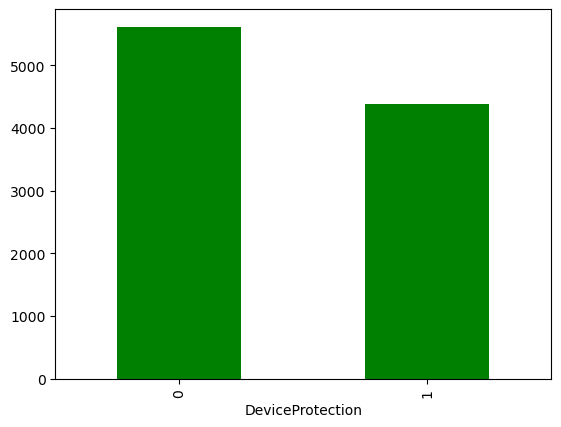

In [27]:
groupedDeviceProtection = df.groupby(by='DeviceProtection').size()
groupedDeviceProtection
%matplotlib inline
groupedDeviceProtection.plot.bar(color='green')

<AxesSubplot: xlabel='Churn'>

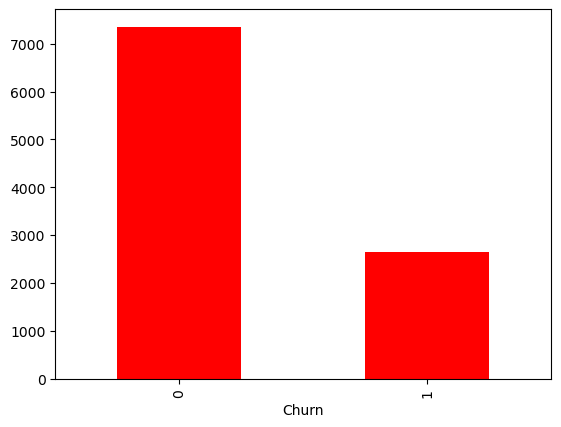

In [28]:
groupedChurn = df.groupby(by='Churn').size()
groupedChurn
%matplotlib inline
groupedChurn.plot.bar(color='red')

<AxesSubplot: xlabel='Bandwidth_GB_Year', ylabel='Tenure'>

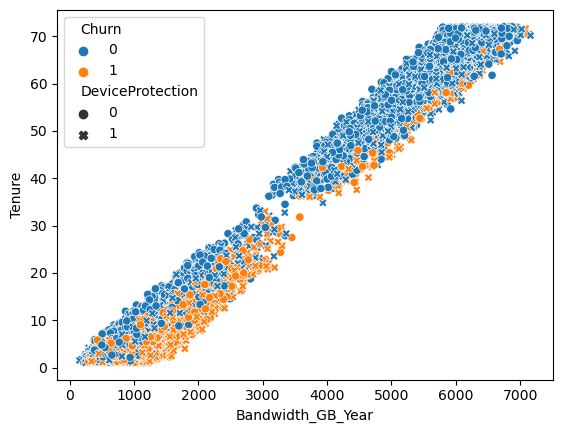

In [29]:
#scatterplot of continuous variables
sns.scatterplot(data=df, x="Bandwidth_GB_Year", y="Tenure", hue="Churn", style="DeviceProtection")

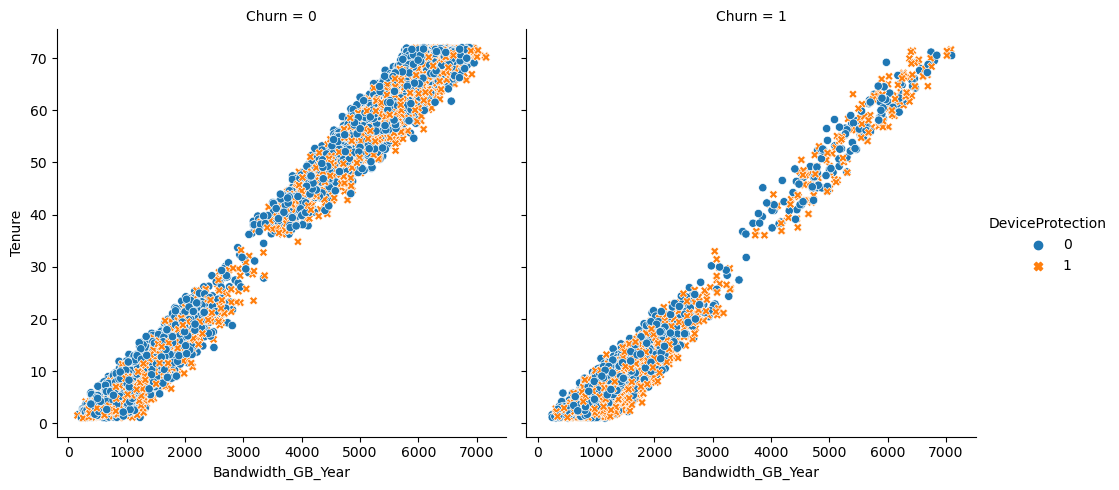

In [30]:
sns.relplot(data=df, x="Bandwidth_GB_Year", y="Tenure", 
            col="Churn", hue="DeviceProtection", style="DeviceProtection", kind="scatter")

In [31]:
#correlation matrix and heatmap to visualize remaining variables
corr_matrix= df.corr().round(2)

In [32]:
features = corr_matrix.index

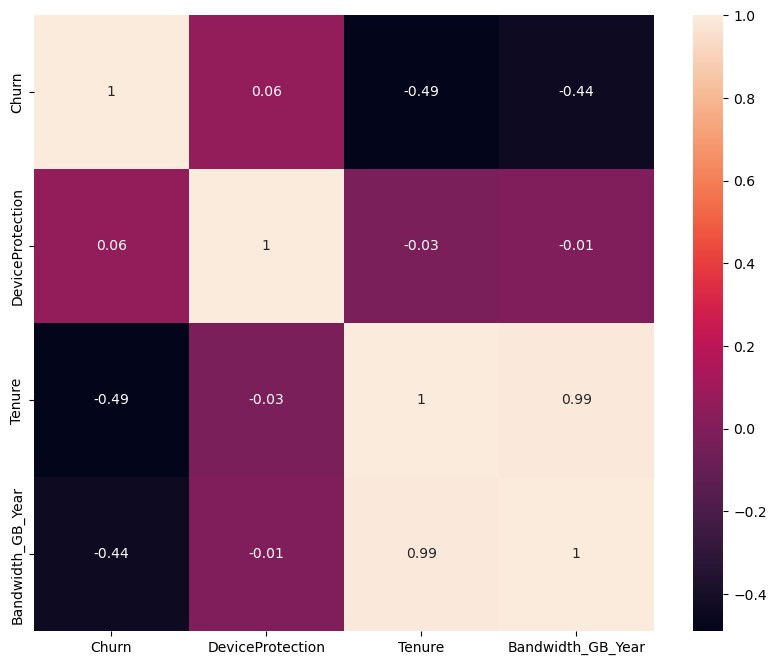

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [34]:
#splitting dataset into training and test data via train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [35]:
#exporting test/training data to csv files
X_train.to_csv(r'AFD209Task2_xtrain.csv')
X_test.to_csv(r'AFD209Task2_xtest.csv')
y_train.to_csv(r'AFD209Task2_ytrain.csv')
y_test.to_csv(r'AFD209Task2_ytest.csv')

In [36]:
#decisiontree/ regression tree analysis
dt= DecisionTreeRegressor(max_depth=3,
                          min_samples_leaf=0.1,
                            random_state=0)

In [37]:
#fitting Decision Tree on training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.1, random_state=0)

In [38]:
#R2 of decision tree training data
dt.score(X_train, y_train)

0.9751398137443361

In [39]:
#R2 of decision tree test data
dt.score(X_test, y_test)

0.9741638156752763

In [40]:
#predicting target variables on test data.
y_pred=dt.predict(X_test)
y_pred

array([60.90192806,  3.96742232,  7.71446956, ..., 67.08436841,
       50.39166172, 60.90192806])

In [41]:
#calculating Mean Squared Error MSE
dt_mse= MSE(y_test, y_pred)
dt_mse

18.172773986622936

In [42]:
# calculate root mean squared error
dt_rmse= dt_mse**(1/2)
dt_rmse

4.2629536693028856

[Text(0.5, 0.875, 'Bandwidth_GB_Year <= 3345.469\nsquared_error = 697.324\nsamples = 7000\nvalue = 34.626'),
 Text(0.3, 0.625, 'Bandwidth_GB_Year <= 1515.654\nsquared_error = 37.96\nsamples = 3494\nvalue = 9.232'),
 Text(0.2, 0.375, 'Bandwidth_GB_Year <= 953.102\nsquared_error = 11.231\nsamples = 2327\nvalue = 6.045'),
 Text(0.1, 0.125, 'squared_error = 4.585\nsamples = 1037\nvalue = 3.967'),
 Text(0.3, 0.125, 'squared_error = 10.316\nsamples = 1290\nvalue = 7.714'),
 Text(0.4, 0.375, 'squared_error = 30.588\nsamples = 1167\nvalue = 15.589'),
 Text(0.7, 0.625, 'Bandwidth_GB_Year <= 5209.615\nsquared_error = 71.35\nsamples = 3506\nvalue = 59.933'),
 Text(0.6, 0.375, 'squared_error = 33.096\nsamples = 1179\nvalue = 50.392'),
 Text(0.8, 0.375, 'Bandwidth_GB_Year <= 5738.197\nsquared_error = 21.234\nsamples = 2327\nvalue = 64.768'),
 Text(0.7, 0.125, 'squared_error = 13.123\nsamples = 872\nvalue = 60.902'),
 Text(0.9, 0.125, 'squared_error = 11.771\nsamples = 1455\nvalue = 67.084')]

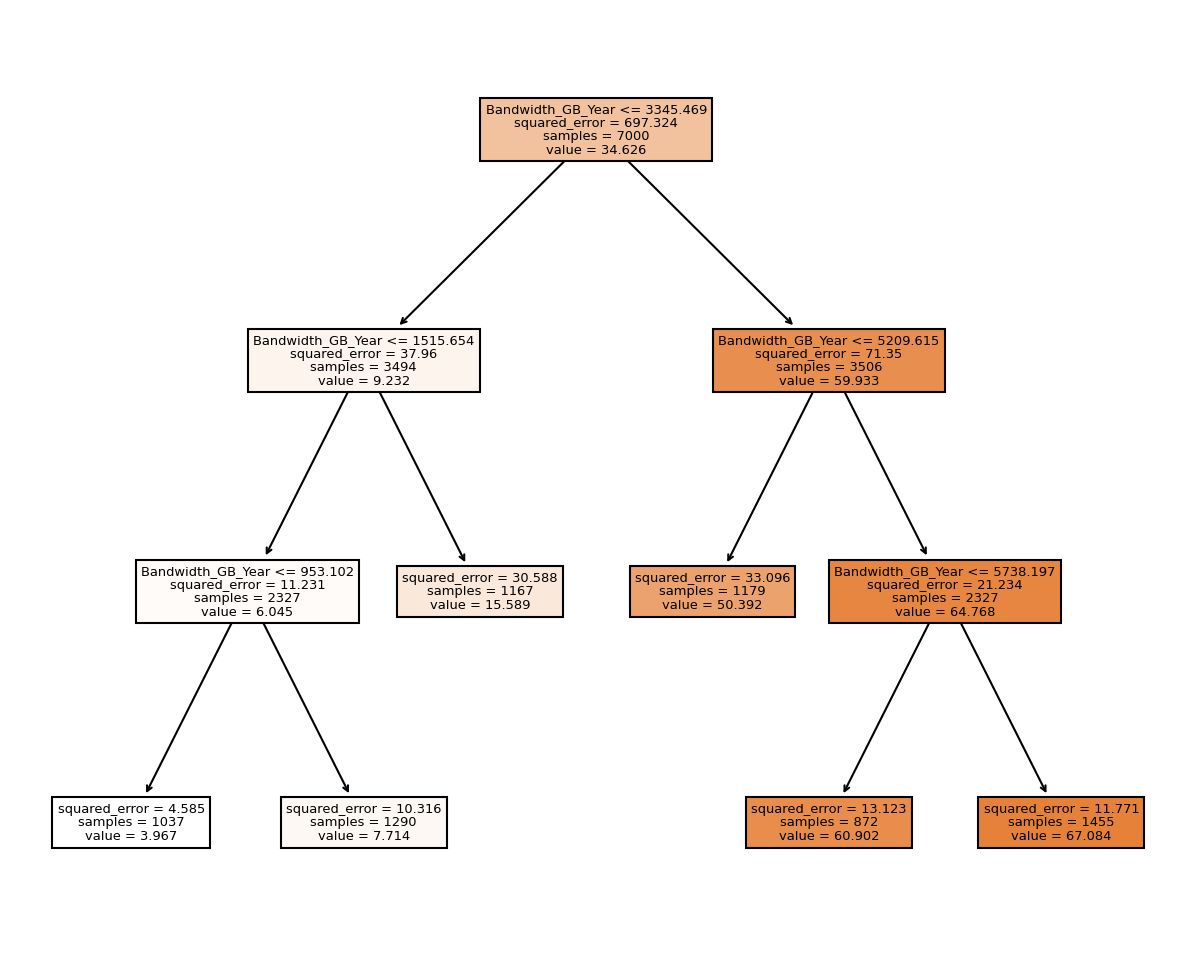

In [43]:
#plotting Decision Tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dt, feature_names=X.columns, filled=True)

In [44]:
#hyperparameter tuning via best params
SEED = 1

In [45]:
dtr= DecisionTreeRegressor(random_state=SEED)

In [46]:
print(dtr.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [47]:
dtbest= DecisionTreeRegressor(ccp_alpha = 0.0, criterion='squared_error',
                          max_depth= None, max_features= None, max_leaf_nodes= None,
                          min_impurity_decrease= 0.0, min_samples_leaf=1, min_samples_split= 2,
                          min_weight_fraction_leaf= 0.0,
                          random_state = 1, splitter= 'best')

In [48]:
#fit hyperparameter tuned DT
dtbest.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [49]:
#R2 of decision tree tuned training data
dtbest.score(X_train, y_train)

1.0

In [50]:
#R2 of decision tree tuned test data
dtbest.score(X_test, y_test)

0.9952823977552193

In [51]:
y_predbest=dtbest.predict(X_test)
y_predbest

array([65.38502 ,  2.477945,  6.184958, ..., 68.6654  , 44.39952 ,
       67.69557 ])

In [52]:
#calculating Mean Squared Error MSE on hyperparams.
dtbest_mse= MSE(y_test, y_predbest)
dtbest_mse

3.318288733183601

In [53]:
# calculate root mean squared error
dtbest_rmse= dtbest_mse**(1/2)
dtbest_rmse

1.8216170654623327

In [ ]:
df.to_csv(r'AFD209Task2_clean.csv')